In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import flet as ft
%matplotlib inline
 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import metrics

global user

<AxesSubplot:>

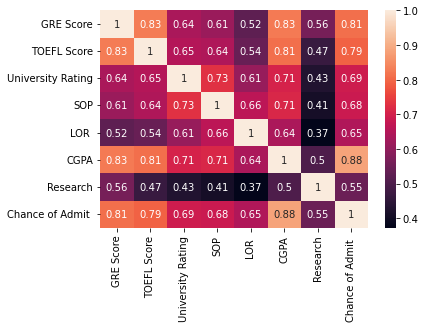

In [23]:
# UCLA申請機率預測
# 分析哪些變量對入取率的影響較大
data = pd.read_csv('Admission_Predict_Ver1.1.csv')
data.drop('Serial No.', axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True)

In [24]:
# 挑3個最大的變量進行訓練
# 資料處理
GRE=data.iloc[:, 0].values.reshape(-1,1)
TOEFL=data.iloc[:, 1].values.reshape(-1,1)
GPA=data.iloc[:, 5].values.reshape(-1,1)
x=np.hstack([GRE, TOEFL, GPA])
y=data.iloc[:, 7].values.reshape(-1,1)
e=[]
# 尋找最好的模型
for i in range(501):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size=0.2)
    for j in range(1,5):
        model = make_pipeline(PolynomialFeatures(j), LinearRegression())
        model.fit(x_train, y_train)
        y_predict = model.predict(x_test)
        value=metrics.mean_absolute_error(y_test,y_predict)
        e.append(metrics.mean_absolute_error(y_test,y_predict))
        if value== min(e):
            ii=i
            jj=j
            xx_train, xx_test, yy_train, yy_test=x_train, x_test, y_train, y_test
print("Accuracy of the model:", 1-min(e))
print("the best random state:", ii)
print("the best order of Polynomial:", jj)

Accuracy of the model: 0.9664499241804404
the best random state: 368
the best order of Polynomial: 2


In [25]:
xx_train, xx_test, yy_train, yy_test = train_test_split(x, y, random_state=ii, test_size=0.2)
model = make_pipeline(PolynomialFeatures(jj), LinearRegression())
model.fit(xx_train, yy_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [36]:
# Flet
def main(page: ft.Page):
    # GUI的排版
    page.title = "UCLA研究所錄取預測"
    page.bgcolor="#F0FFFF"
    page.window_width = 1000
    page.window_height =800
    page.horizontal_alignment = ft.CrossAxisAlignment.CENTER
    user=np.array([[0.0, 0.0, 0.0]])
    # 按鈕的function        
    def predict_click(a):
        #輸入資料
        CGPA=0.0
        CGPA=float((100-float(t1.value))/9.5)
        if CGPA>10.0:
            CGPA=10.0
        user[0][2]=CGPA
        user[0][0]=int(t2.value)
        user[0][1]=int(t3.value)
        y_predict = model.predict(user)
        #預測
        if y_predict[0][0]>1:
            y_predict[0][0]=1.0
        t4.value=f"錄取機率: {format(y_predict[0][0], '.3f')}" 
        
        if y_predict[0][0]>0.75:
            t5.value="恭喜您錄取機率很高喔! 祝您申請順利!"
            i4.src="clap.jpg"
        elif y_predict[0][0]>0.5 and y_predict[0][0]<0.75 :
            t5.value="再多努力一些，成績越好，錄取機率越高!"
            i4.src="work.png"            
        else:
            t5.value="嗚嗚...可能要同步進行其他方法了"
            i4.src="cry.jpg"
        page.update()
    
    # ------建立物件------
    i1 = ft.Image(src="UCLA.jpg", width=300, height=200, expand=1)
    i2 = ft.Image(src="ucla-logo.png", width=300, height=200, expand=1)
    i3 = ft.Image(src="UCLA1.jpeg", width=300, height=200, expand=1)
    t1=ft.TextField(expand=1)
    t2=ft.TextField(expand=1)
    t3=ft.TextField(expand=1)
    b1=ft.TextButton(text="Predict", width=150, on_click=predict_click, expand=1)
    t4=ft.Text(size=18, expand=1)
    t5=ft.Text(size=18, expand=1)
    i4 = ft.Image(src="wait.jpg", width=300, height=200, expand=1)
    # ------將物件進行排版------
    page.add(
        ft.Row(
            controls=[
                i1,i2,i3
            ]
        ),
        ft.Row(
            controls=[
                ft.Text("輸入您的在校排名百分比(如:在100人中第一名，則輸入1): ", size=18, expand=1),
                t1,
            ]
        ),
       ft.Row(
            controls=[
                ft.Text("輸入您的GRE成績(滿分340): ", size=18, expand=1),
                t2,
            ]
        ),
        ft.Row(
            controls=[
                ft.Text("輸入您的TOEFL成績(滿分120): ", size=18, expand=1),
                t3,
            ]
        ),
        ft.Row(
            controls=[
                b1
            ]
        ),
        ft.Row(
            controls=[
                    t4
            ]
        ),
        ft.Row(
            controls=[
                t5,i4
             ]
         )
     )
    
ft.app(target=main)